In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [3]:
%cd /content/drive/MyDrive/Image Analysis/Ex_1X

/content/drive/MyDrive/Image Analysis/Ex_1X


Download the input images

In [4]:
input_img1 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_1X/img/gran01_64.pgm", cv2.IMREAD_GRAYSCALE)

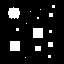

In [5]:
cv2_imshow(input_img1)

In [6]:
input_img1.shape

(64, 64)

In [7]:
input_img2 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_1X/img/immed_gray_inv_20051218_frgr4.pgm", cv2.IMREAD_GRAYSCALE)

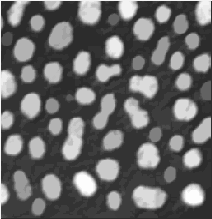

In [8]:
cv2_imshow(input_img2)

In [9]:
input_img2.shape

(219, 212)

Read the input txt with the settings

In [14]:
def readFile(name):
  #open the file with the information
  file = open(name, "r")
  inp = file.readlines()
  file.close()

  #remove the \n 
  numb = []
  for i in range(len(inp)):
    numb.append(int(inp[i].strip('\n')))

  print(numb)

  return numb

In [15]:
x1, y1, CONN1, LABEL_FZ1 = readFile('11a_input1.txt')

[0, 0, 4, 255]


In [16]:
x2, y2, CONN2, LABEL_FZ2 = readFile('11a_input2.txt')

[36, 57, 4, 255]


perform the fletzone algorithm

In [17]:
LABEL_NO_FZ = 0

In [24]:
def setImageValue(img, LABEL_NO_FZ):
  return np.full((img.shape[0],img.shape[1]), LABEL_NO_FZ)

In [25]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [26]:
def GetNeighbors(x, y, inp_img, CONN):

  nrows = inp_img.shape[0]
  ncols = inp_img.shape[1]

  row_fil = calculateRange(1, x, nrows)
  col_fil = calculateRange(1, y, ncols)

  neighbors = []

  if CONN == 4:
    #we are in 4-connectivity
    for row in row_fil:
      if row != 0:
        neighbors.append((x+row, y))

    for col in col_fil:
      if col != 0:
        neighbors.append((x, y+col))

  else:
    #we are in 8 connectivity
    for row in row_fil:
      for col in col_fil:
        if not(row == 0 and col == 0):
          neighbors.append((x+row, y+col))

  return neighbors

In [27]:
def Insert(flatzone, x, y):
  flatzone.append((x, y))
  return flatzone

In [28]:
def Extract(flatzone):
  return flatzone.pop()

In [29]:
def checkNeighbors(r, c, neighbors, input_img, out_img, LABEL_FZ, flatzone):
  for i in range(len(neighbors)):

    rr, cc = neighbors[i]
      
    p1 = input_img[r][c]
    p2 = input_img[rr][cc]

    if ((p1 == p2) and (out_img[rr][cc] != int(LABEL_FZ))):

      out_img[rr][cc] = int(LABEL_FZ)
      flatzone = Insert(flatzone, rr, cc)

  return out_img, flatzone

In [30]:
def ReconstructFlatZone(input_img, x, y, LABEL_FZ, CONN):

  #initialize the output
  out_img = setImageValue(input_img, LABEL_NO_FZ)

  #set the value of x pixel in output as flatzone label
  out_img[x][y] = LABEL_FZ

  #creation of the flatzone queue
  flatzone = []

  #flatzone = Insert(flatzone, x, y, inp_img)
  flatzone = Insert(flatzone, x, y)

  while(len(flatzone) > 0):

    r, c = Extract(flatzone)

    neighbors = GetNeighbors(r, c, input_img, CONN)

    out_img, flatzone = checkNeighbors(r, c, neighbors, input_img, out_img, LABEL_FZ, flatzone)

  return out_img



In [33]:
out1 = ReconstructFlatZone(input_img1,x1,y1,LABEL_FZ1, CONN1)

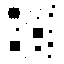

In [34]:
cv2_imshow(out1)

In [35]:
out2 = ReconstructFlatZone(input_img2,x2,y2,LABEL_FZ2, CONN2)

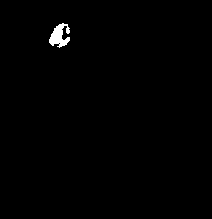

In [36]:
cv2_imshow(out2)

TEST the results

In [40]:
true_output1 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_1X/img/gran01_64_flatzone0_0.pgm", cv2.IMREAD_GRAYSCALE)

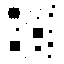

In [38]:
cv2_imshow(true_output1)

In [41]:
true_output2 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_1X/img/immed_gray_inv_20051218_frgr4_flatzone57_36.pgm", cv2.IMREAD_GRAYSCALE)

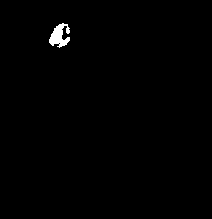

In [42]:
cv2_imshow(true_output2)

In [43]:
def compare(I1, I2):

  output = 0

  shape1 = I1.shape
  shape2 = I2.shape

  #first check if have the same shape
  if shape1 != shape2:
    return output

  nrows = I1.shape[0]
  ncols = I2.shape[1]

  for i in range(nrows):
    for j in range(ncols):
      if I1[i][j] != I2[i][j]:
        return output

  #the two images matches
  output = 1
  return output

In [44]:
compare(true_output1, out1)

1

In [45]:
compare(true_output2, out2)

1